In [1]:
%load_ext autoreload
%autoreload 2

import sys


import os
import time

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
from Simulation import Simulation

In [3]:
import neural_net.nn as nn
from neural_net.visualize import visualize_genome, visualize_net, display_gene
from Sandbox import Sandbox
import random

In [4]:
logging_path = '/Users/so/Documents/projects/personal/2048_AI/logs'
a = Simulation(log_folder = logging_path)

1000 NetworkGenomes created, ready for simulation


In [15]:
a.simulate()

a.adjust_fitness()

a.reproduce()

a.mutate_and_speciate()
# [s.fitness for s in a.species[0]['children']]


for i in range(1500):

    now = time.time()
    a.simulate()
    sim = time.time() - now

    a.adjust_fitness()

    a.reproduce()

    now = time.time()
    a.mutate_and_speciate()
    mas = time.time() - now
    print(f'mutate: {mas:.3f}, simulate: {sim:.3f}')

(max, avg) unadjusted fitness of generation 501 = (70, 11.366)
total # of species: 4, # of stagnant species: 0
[29, 31, 33, 34]
(max, avg) unadjusted fitness of generation 502 = (124, 11.514)
total # of species: 4, # of stagnant species: 0
[29, 31, 33, 34]
mutate: 0.051, simulate: 0.630
(max, avg) unadjusted fitness of generation 503 = (115, 11.281)
total # of species: 4, # of stagnant species: 0
[29, 31, 33, 34]
mutate: 0.050, simulate: 0.620
(max, avg) unadjusted fitness of generation 504 = (86, 12.149)
total # of species: 4, # of stagnant species: 0
[29, 31, 33, 34]
mutate: 0.051, simulate: 0.685
(max, avg) unadjusted fitness of generation 505 = (77, 11.31)
total # of species: 4, # of stagnant species: 0
[29, 31, 33, 34]
mutate: 0.054, simulate: 0.620
(max, avg) unadjusted fitness of generation 506 = (102, 11.183)
total # of species: 4, # of stagnant species: 0
[29, 31, 33, 34]
mutate: 0.053, simulate: 0.625
(max, avg) unadjusted fitness of generation 507 = (113, 11.67)
total # of s

: 

In [6]:
{s: a.species[s]['stats'][1] for s in a.species}

{29: 138, 31: 152, 33: 132, 34: 67}

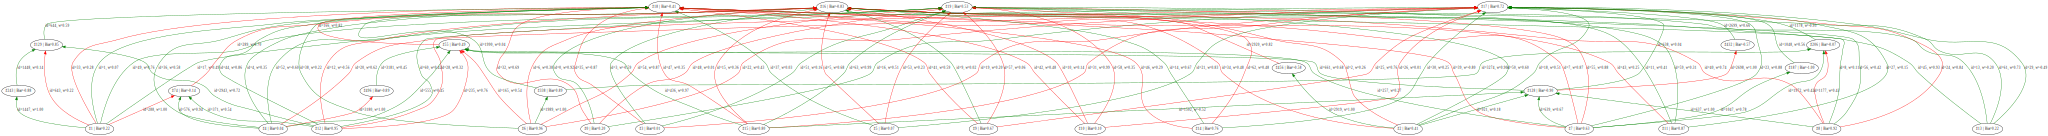

In [13]:
visualize_genome(a.species[34]['children'][0])

In [14]:
[a.species[34]['children'][c].fitness for c in range(len(a.species[34]['children']))]

[0.2701612903225806,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,

In [23]:
a.species_size[146]

21

In [5]:
# now = time.time()
# a.simulate()
# print(time.time() - now)
# now = time.time()

# a.adjust_fitness()
# print(time.time() - now)
# now = time.time()

# a.reproduce()
# print(time.time() - now)
# now = time.time()
# # [s.fitness for s in a.species[0]['children']]


# for i in range(20):
#     a.mutate_and_speciate()
#     print(f'mutate_and_speciate: {time.time() - now:.2f}')
#     now = time.time()

#     a.simulate()
#     print(f'simulate: {time.time() - now:.2f}')
#     now = time.time()

#     a.adjust_fitness()
#     print(f'adjust_fitness: {time.time() - now:.3f}')
#     now = time.time()
    
#     a.reproduce()
#     print(f'reproduce: {time.time() - now:.2f}')
#     now = time.time()

(max, avg) unadjusted fitness of generation 0 = (32, 5.546)
0.24241089820861816
0.00014781951904296875
0.18317890167236328
mutate_and_speciate: 0.02
(max, avg) unadjusted fitness of generation 1 = (64, 5.634)
simulate: 0.27
adjust_fitness: 0.000
reproduce: 0.17
mutate_and_speciate: 0.07
(max, avg) unadjusted fitness of generation 2 = (32, 5.282)
simulate: 0.21
adjust_fitness: 0.000
reproduce: 0.21
mutate_and_speciate: 0.12
(max, avg) unadjusted fitness of generation 3 = (32, 5.34)
simulate: 0.31
adjust_fitness: 0.000
reproduce: 0.17
mutate_and_speciate: 0.16
(max, avg) unadjusted fitness of generation 4 = (32, 5.58)
simulate: 0.34
adjust_fitness: 0.000
reproduce: 0.20
mutate_and_speciate: 0.18
(max, avg) unadjusted fitness of generation 5 = (32, 5.584)
simulate: 0.37
adjust_fitness: 0.000
reproduce: 0.09
mutate_and_speciate: 0.27
(max, avg) unadjusted fitness of generation 6 = (32, 5.51)
simulate: 0.41
adjust_fitness: 0.000
reproduce: 0.09
mutate_and_speciate: 0.32
(max, avg) unadjuste

KeyError: 0

In [8]:
a.species

{0: {'progenitor': Neural Network Genome with 20 neurons, 64 synapses,
  'children': [Neural Network Genome with 20 neurons, 64 synapses,
   Neural Network Genome with 20 neurons, 64 synapses]},
 1: {'progenitor': Neural Network Genome with 20 neurons, 64 synapses,
  'children': [Neural Network Genome with 20 neurons, 64 synapses,
   Neural Network Genome with 20 neurons, 64 synapses,
   Neural Network Genome with 20 neurons, 64 synapses,
   Neural Network Genome with 20 neurons, 64 synapses]},
 3: {'progenitor': Neural Network Genome with 20 neurons, 64 synapses,
  'children': [Neural Network Genome with 20 neurons, 64 synapses,
   Neural Network Genome with 20 neurons, 64 synapses,
   Neural Network Genome with 20 neurons, 64 synapses]},
 19: {'progenitor': Neural Network Genome with 21 neurons, 66 synapses,
  'children': [Neural Network Genome with 21 neurons, 66 synapses,
   Neural Network Genome with 21 neurons, 66 synapses,
   Neural Network Genome with 21 neurons, 66 synapses,
 